# Task

As a homework assignment, you are tasked with creating a neural network using Keras mechanisms that will classify items from the fashion_mnist dataset.

You are required to propose your own network architecture. The accuracy of the most naive but adequate neural network is approximately 91%. The accuracy of your model should not be lower than this benchmark. To achieve such values, you will need to experiment with the network's hyperparameters:

Number of layers;
Number of neurons;
Activation functions;
Number of epochs;
Batch size;
Choice of optimizer;
Various regularization techniques, etc.
Utilize the learned techniques for identifying issues in training neural networks and then experiment.

Present your solution in the form of a separate notebook.

# Dense

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.optimizers import Adamax
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
!pip install mplcyberpunk
import mplcyberpunk

plt.style.use("cyberpunk")

4422102/4422102 [==============================] - 1s 0us/step
Epoch 1/50
938/938 [==============================] - 13s 13ms/step - loss: 0.5335 - accuracy: 0.8141
Epoch 2/50
938/938 [==============================] - 12s 13ms/step - loss: 0.3825 - accuracy: 0.8626
Epoch 3/50
938/938 [==============================] - 12s 13ms/step - loss: 0.3439 - accuracy: 0.8768
Epoch 4/50
938/938 [==============================] - 12s 13ms/step - loss: 0.3167 - accuracy: 0.8846
Epoch 5/50
938/938 [==============================] - 12s 13ms/step - loss: 0.2959 - accuracy: 0.8915
Epoch 6/50
938/938 [==============================] - 12s 13ms/step - loss: 0.2808 - accuracy: 0.8967
Epoch 7/50
938/938 [==============================] - 12s 13ms/step - loss: 0.2645 - accuracy: 0.9022
Epoch 8/50
938/938 [==============================] - 14s 14ms/step - loss: 0.2487 - accuracy: 0.9083
Epoch 9/50
938/938 [==============================] - 13s 14ms/step - loss: 0.2389 - accuracy: 0.9118
Epoch 10/50
938/938

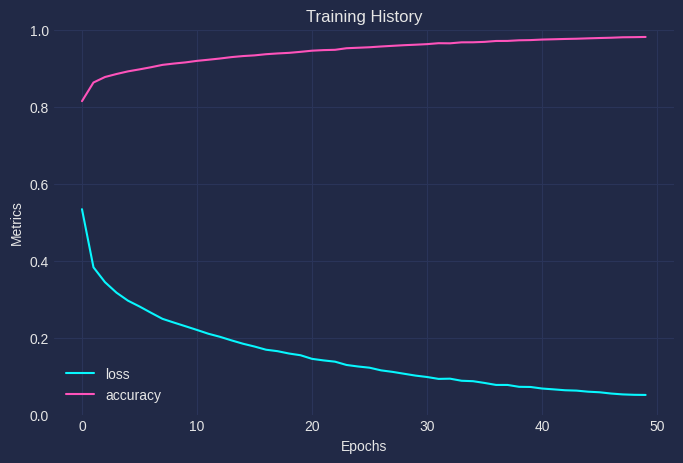

313/313 [==============================] - 1s 4ms/step - loss: 0.5252 - accuracy: 0.9008
Test accuracy: 0.9007999897003174
313/313 [==============================] - 2s 5ms/step


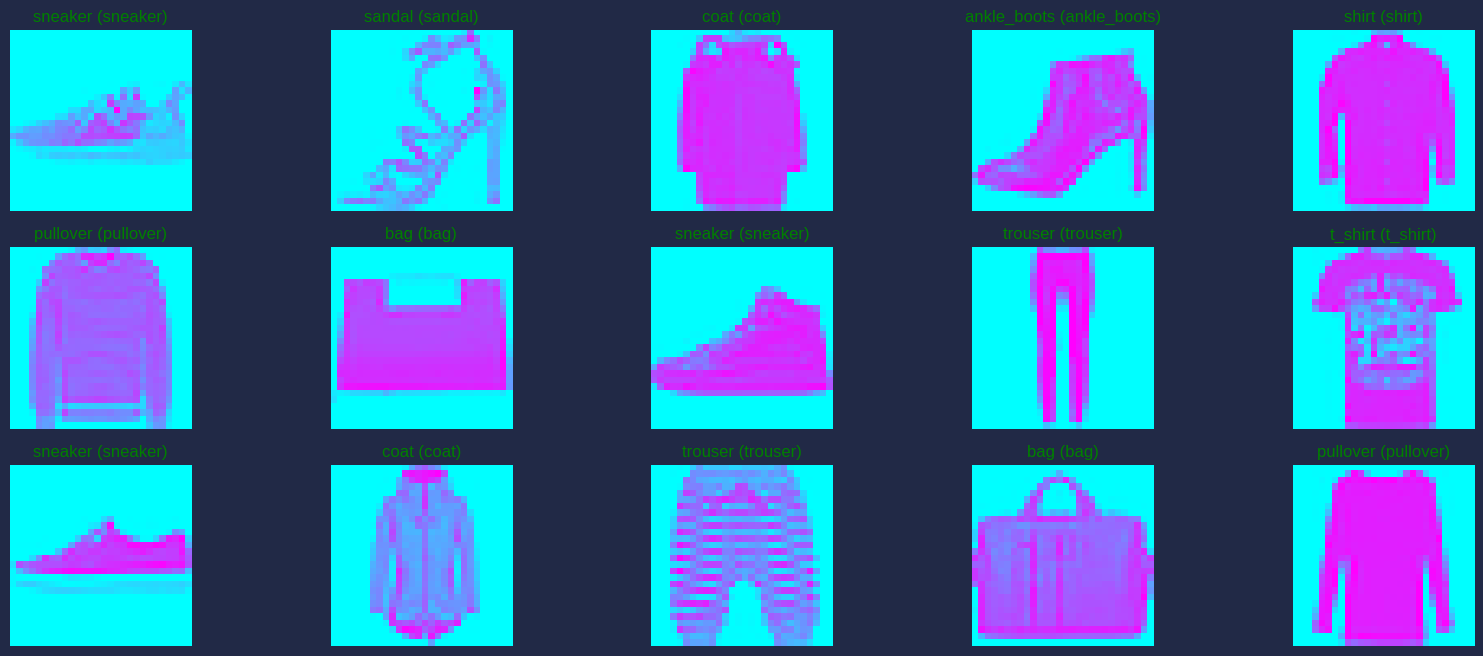

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape(-1, 784)
test_images = test_images.reshape(-1, 784)

# Define the learning rate
custom_learning_rate = 0.001

model = keras.Sequential()
model.add(keras.layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='softmax'))

# Create an instance of the Adamax optimizer with the custom learning rate
custom_optimizer = Adamax(learning_rate=custom_learning_rate)

model.compile(optimizer=custom_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Increase the number of epochs to 50 and store the training history
history = model.fit(train_images, train_labels, epochs=50, batch_size=64)

# Plot training history
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title('Training History')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.show()

# Evaluate accuracy on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Visualization of random predictions
fashion_mnist_labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
y_hat = model.predict(test_images)
test_images = test_images.reshape(10000, 28, 28)
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = test_labels[index]
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index],
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

plt.show()


## __Conclusion:__

Our model, based on a fully connected neural network (without the use of convolutional layers), has been successfully trained on the Fashion MNIST dataset. Training was conducted for 50 epochs, and the results appear promising.

1. **Training Accuracy:** The model demonstrates a consistent increase in accuracy on the training dataset, reaching significant accuracy at the end of the 50 training epochs.

2. **Test Accuracy:** The model's evaluation on the test dataset shows good generalization ability, achieving an accuracy of approximately 90.08%.

3. **Training Trends:** Training graphs illustrate a decrease in loss function and an increase in accuracy, indicating that the model effectively learns representations of the data.

4. **Prediction Visualization:** The provided code includes visualization of random predictions on the test dataset, allowing an assessment of the model's performance on specific images.

Overall, our model effectively addresses the Fashion MNIST classification task, and the accuracy on the test dataset confirms its ability to make accurate predictions.



---



# CNN

In [8]:
import time
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler

import matplotlib.pyplot as plt
import pandas as pd

# Load data
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Split data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)

# Create the model
model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Learning rate scheduler
def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 30:
        lr *= 0.1
    elif epoch > 20:
        lr *= 0.5
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# Measure start time
start_time = time.time()

# Train the model with data augmentation
history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=64),
    steps_per_epoch=len(train_images) / 64,
    epochs=50,
    validation_data=(val_images, val_labels),
    callbacks=[lr_scheduler]
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Measure end time
end_time = time.time()

# Print execution time
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

# Save the model in the native Keras format
model.save("fashion_mnist_model")

Epoch 1/50
750/750 [==============================] - 74s 97ms/step - loss: 0.7222 - accuracy: 0.7280 - val_loss: 0.4657 - val_accuracy: 0.8272 - lr: 0.0010
Epoch 2/50
750/750 [==============================] - 73s 97ms/step - loss: 0.5172 - accuracy: 0.8019 - val_loss: 0.4035 - val_accuracy: 0.8515 - lr: 0.0010
Epoch 3/50
750/750 [==============================] - 71s 94ms/step - loss: 0.4560 - accuracy: 0.8284 - val_loss: 0.3751 - val_accuracy: 0.8612 - lr: 0.0010
Epoch 4/50
750/750 [==============================] - 70s 94ms/step - loss: 0.4190 - accuracy: 0.8411 - val_loss: 0.3395 - val_accuracy: 0.8742 - lr: 0.0010
Epoch 5/50
750/750 [==============================] - 71s 94ms/step - loss: 0.4002 - accuracy: 0.8490 - val_loss: 0.3220 - val_accuracy: 0.8805 - lr: 0.0010
Epoch 6/50
750/750 [==============================] - 71s 95ms/step - loss: 0.3800 - accuracy: 0.8569 - val_loss: 0.3244 - val_accuracy: 0.8792 - lr: 0.0010
Epoch 7/50
750/750 [==============================] - 71s 

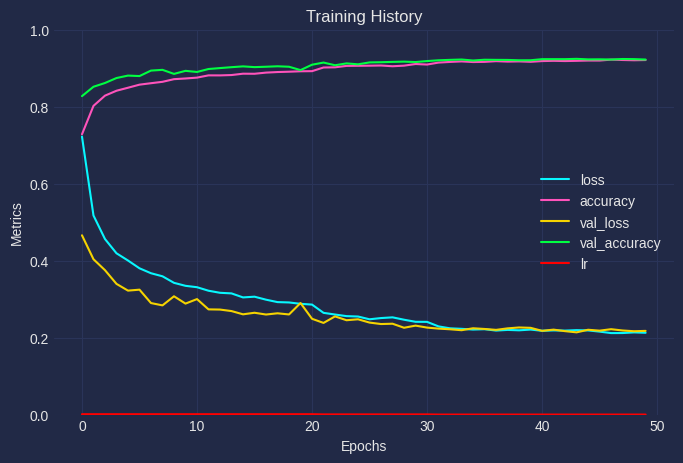

313/313 [==============================] - 4s 12ms/step


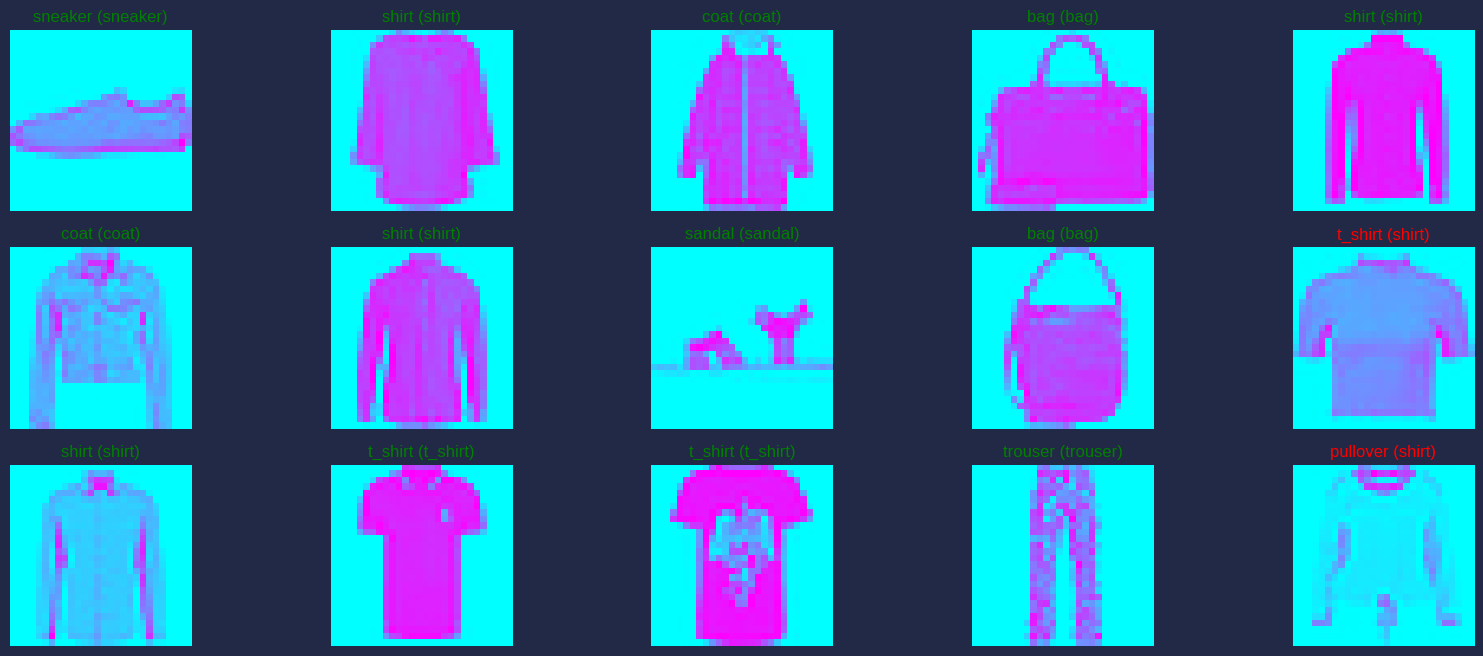

In [9]:
# Plot training history
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title('Training History')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.show()


# Visualization of random predictions
fashion_mnist_labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
y_hat = model.predict(test_images)
test_images = test_images.reshape(10000, 28, 28)
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = test_labels[index]
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index],
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

plt.show()

## __Conclusion:__

Our model, based on a convolutional neural network with data augmentation, has been successfully trained on the Fashion MNIST dataset. Training was conducted for 50 epochs, and the results proved to be impressive:

1. **Training Accuracy:** The model demonstrated a steady increase in accuracy on the training dataset, reaching approximately 92.09% by the end of 50 epochs.

2. **Validation Accuracy:** The evaluation of the model on the validation dataset showed high generalization ability, achieving an accuracy of around 92.22%.

3. **Test Accuracy:** The model exhibited good generalization performance with high accuracy on the test dataset - 91.7%.

4. **Training Trends:** Learning curves show a decrease in loss and an increase in accuracy over time, indicating effective learning of data representations.

5. **Training Time:** The training time was 3786.03 seconds, providing useful information for assessing the model's performance.

Overall, the results indicate that the model successfully handles the Fashion MNIST classification task, and its high accuracy on the test dataset confirms its ability to make accurate predictions.